<h1>Assignment-13: Try various CNN networks on MNIST dataset [M]


<h3><p>1. Please try out models with different architectures, you can experiment with number of layers as well.</p>
<p>2. Include error plots.</p>
<p>3. Compare all your models in a tabular format using prettytable library or similar ones.</p></h3>

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

    

<h3>Model 1

In [ ]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
from tensorflow.python import keras as keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/vimal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5


<h3>Model 2

In [4]:
batch_size = 128
num_classes = 10
epochs = 10
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.3213 - acc: 0.8992 - val_loss: 0.0652 - val_acc: 0.9798
Epoch 2/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.1030 - acc: 0.9695 - val_loss: 0.0428 - val_acc: 0.9862
Epoch 3/10
60000/60000 [==============================] - 44s 732us/step - loss: 0.0792 - acc: 0.9771 - val_loss: 0.0365 - val_acc: 0.9892
Epoch 4/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.0596 - acc: 0.9828 - val_loss: 0.0360 - val_acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 45s 745us/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0348 - val_acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 45s 753us/step - loss: 0.0433 - acc: 0.9871 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 7/10
60000/60000 [==============================] - 48s 794us/step - loss: 0.0383 - acc: 0.9887 - val_loss: 0.

<h3>Model 3

In [15]:
batch_size = 128
num_classes = 10
epochs = 10
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.2254 - acc: 0.9306 - val_loss: 0.0493 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0684 - acc: 0.9796 - val_loss: 0.0314 - val_acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 46s 771us/step - loss: 0.0497 - acc: 0.9857 - val_loss: 0.0250 - val_acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0398 - acc: 0.9880 - val_loss: 0.0273 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 46s 766us/step - loss: 0.0331 - acc: 0.9905 - val_loss: 0.0214 - val_acc: 0.9933
Epoch 6/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0283 - acc: 0.9914 - val_loss: 0.0227 - val_acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 46s 774us/step - loss: 0.0249 - acc: 0.9923 - val_loss: 0.

<h3>Model 4

In [16]:
batch_size = 128
num_classes = 10
epochs = 10
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(2,2),
                 activation='relu',
                 input_shape=input_shape))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (2, 2), activation='relu'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2546 - acc: 0.9207 - val_loss: 0.0443 - val_acc: 0.9849
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0702 - acc: 0.9794 - val_loss: 0.0297 - val_acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0503 - acc: 0.9853 - val_loss: 0.0336 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0398 - acc: 0.9881 - val_loss: 0.0258 - val_acc: 0.9926
Epoch 5/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0328 - acc: 0.9900 - val_loss: 0.0206 - val_acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0190 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0256 - acc: 0.9926 - val_loss: 0.0238 - val_acc

<h2>Error Plots

<IPython.core.display.Javascript object>


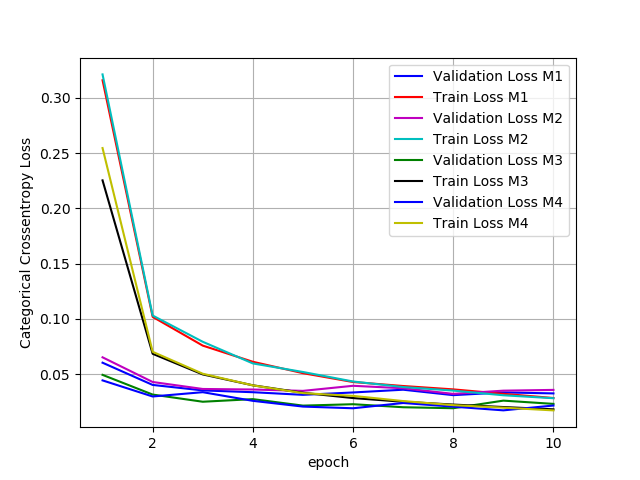

In [26]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss M1")
ax.plot(x, ty, 'r', label="Train Loss M1")
vy = history2.history['val_loss']
ty = history2.history['loss']
ax.plot(x, vy, 'm', label="Validation Loss M2")
ax.plot(x, ty, 'c', label="Train Loss M2")
vy = history3.history['val_loss']
ty = history3.history['loss']
ax.plot(x, vy, 'g', label="Validation Loss M3")
ax.plot(x, ty, 'k', label="Train Loss M3")
vy = history4.history['val_loss']
ty = history4.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss M4")
ax.plot(x, ty, 'y', label="Train Loss M4")
plt.legend()  
plt.grid()
fig.canvas.draw()

<h2>Conclusions

In [27]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","Convolution layers", "Accuracy"]

x.add_row(["Model 1","Two Layers",99.15])
x.add_row(["Model 2","Two Layers",99.07])
x.add_row(["Model 3","Three Layers",99.37])
x.add_row(["Model 4","Four Layers",99.33])


print(x)

+---------+--------------------+----------+
|  Model  | Convolution layers | Accuracy |
+---------+--------------------+----------+
| Model 1 |     Two Layers     |  99.15   |
| Model 2 |     Two Layers     |  99.07   |
| Model 3 |    Three Layers    |  99.37   |
| Model 4 |    Four Layers     |  99.33   |
+---------+--------------------+----------+
